In [1]:
import os,sys
from dotenv import find_dotenv,load_dotenv
load_dotenv(find_dotenv())
src_path = os.environ.get('PROJECT_SRC')
os.chdir(src_path)

In [2]:
import pypsa
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
plt.style.use('ggplot')
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature
import data_reader_writer

In [3]:
My_network=pypsa.Network()
My_network.import_from_csv_folder('LOPF_Coupled')

INFO:pypsa.components:Applying weightings to all columns of `snapshot_weightings`
INFO:pypsa.io:Imported network LOPF_Coupled has buses, generators, lines, links, loads, storage_units


The marginal cost of heat pumps and gas boilers for diffrent countries can be referred from https://www.iea.org/data-and-statistics/charts/marginal-cost-of-heating-with-residential-heat-pumps-and-gas-boilers-under-different-energy-cost-assumptions-in-selected-countries-between-h1-2021-and-h1-2022.

In [4]:
for i in range(29):
    My_network.add(
        "Generator",
        "boiler {}".format(i+1),
       # bus0=B0[i],
   bus='Heat Bus {}'.format(i+1),
      p_nom_extendable=True,
        efficiency=0.94,
        marginal_cost=120.0,
        carrier="heat",
    )
    

In [5]:
#for i in range(29):
 #   My_network.add('Bus','Gas Bus {}'.format(i+1),carrier='gas')
    
#for i in range(29):
 #    My_network.add(
  #  "Link",
  #  "CHP {}".format(i+1),
   # bus0="Gas Bus {}".format(i+1),
   # bus1="Heat Bus {}".format(i+1),
    #p_nom_extendable=True,
   # capital_cost=1400,
   # efficiency=0.8,
    #     carrier='heat',
#)
        
#for i in range (29):   
   # My_network.add(
   # "Link",
   # "P2G {}".format(i+1),
    #bus0=My_network.buses.index.tolist()[29+i],
    #bus1='Gas Bus {}'.format(i+1),
   # efficiency=0.8,
  #  capital_cost=1000,
 #   p_nom_extendable=True,
#)


In [6]:
My_network.links

,bus0,bus1,carrier,p_nom,marginal_cost,ramp_limit_up,ramp_limit_down,p_nom_min,p_nom_max,type,...,committable,start_up_cost,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Link,,,,,,,,,,,,,,,,,,,,,
heat pump Beauly,Beauly,Heat Bus 1,heat,104.988,0.0,1.0,1.0,0.0,104.988,,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
heat pump Peterhead,Peterhead,Heat Bus 2,heat,470.460,0.0,1.0,1.0,0.0,470.460,,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
heat pump Errochty,Errochty,Heat Bus 3,heat,219.324,0.0,1.0,1.0,0.0,219.324,,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
heat pump Denny/Bonnybridge,Denny/Bonnybridge,Heat Bus 4,heat,1601.760,0.0,1.0,1.0,0.0,1601.760,,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
heat pump Neilston,Neilston,Heat Bus 5,heat,261.828,0.0,1.0,1.0,0.0,261.828,,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
heat pump Strathaven,Strathaven,Heat Bus 6,heat,2968.704,0.0,1.0,1.0,0.0,2968.704,,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
heat pump Torness,Torness,Heat Bus 7,heat,486.348,0.0,1.0,1.0,0.0,486.348,,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
heat pump Eccles,Eccles,Heat Bus 8,heat,151.980,0.0,1.0,1.0,0.0,151.980,,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
heat pump Harker,Harker,Heat Bus 9,heat,363.204,0.0,1.0,1.0,0.0,363.204,,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0


In [7]:
contingency_factor = 0.7
My_network.lines.s_max_pu[0:99] *= contingency_factor

In [8]:
My_network.consistency_check() 

In [9]:
 My_network.lopf(My_network.snapshots,solver_name="gurobi", pyomo=False)

INFO:pypsa.linopf:Prepare linear problem
INFO:pypsa.linopf:Total preparation time: 131.26s
INFO:pypsa.linopf:Solve linear problem using Gurobi solver


Set parameter Username
Academic license - for non-commercial use only - expires 2024-02-29
Read LP format model from file C:\Users\salene\AppData\Local\Temp\pypsa-problem-2u3j67ns.lp
Reading time = 83.65 seconds
obj: 29589908 rows, 8050499 columns, 52907623 nonzeros
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1185G7 @ 3.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 29589908 rows, 8050499 columns and 52907623 nonzeros
Model fingerprint: 0xcea5ef64
Coefficient statistics:
  Matrix range     [6e-05, 3e+03]
  Objective range  [1e+00, 1e+03]
  Bounds range     [1e+07, 1e+07]
  RHS range        [4e-06, 1e+06]
Presolve removed 27268524 rows and 239099 columns (presolve time = 7s) ...
Presolve removed 27268524 rows and 239099 columns (presolve time = 10s) ...
Presolve removed 27767179 rows and 5448605 columns (presolve time = 15s) ...
Presolv

  89   5.43213447e+11  5.43211238e+11  1.99e-02 9.09e-13  5.55e-01   388s
  90   5.43212720e+11  5.43211376e+11  1.18e-02 9.09e-13  3.36e-01   393s
  91   5.43212150e+11  5.43211522e+11  5.18e-03 1.25e-12  1.55e-01   396s
  92   5.43212025e+11  5.43211572e+11  3.77e-03 1.14e-12  1.12e-01   400s
  93   5.43211864e+11  5.43211580e+11  2.39e-03 1.02e-12  7.03e-02   403s
  94   5.43211748e+11  5.43211616e+11  9.23e-04 1.14e-12  3.15e-02   406s
  95   5.43211718e+11  5.43211629e+11  5.69e-04 9.09e-13  2.09e-02   408s
  96   5.43211705e+11  5.43211640e+11  4.29e-04 9.09e-13  1.54e-02   411s
  97   5.43211690e+11  5.43211647e+11  2.54e-04 1.14e-12  9.92e-03   413s
  98   5.43211674e+11  5.43211660e+11  7.89e-05 1.36e-12  3.22e-03   415s
  99   5.43211673e+11  5.43211663e+11  6.79e-05 9.09e-13  2.47e-03   418s
 100   5.43211668e+11  5.43211664e+11  1.53e-05 9.09e-13  8.83e-04   420s
 101   5.43211667e+11  5.43211666e+11  4.10e-06 6.84e-11  1.74e-04   422s
 102   5.43211667e+11  5.43211667e+11 

INFO:pypsa.linopf:Optimization successful. Objective value: 5.43e+11


('ok', 'optimal')

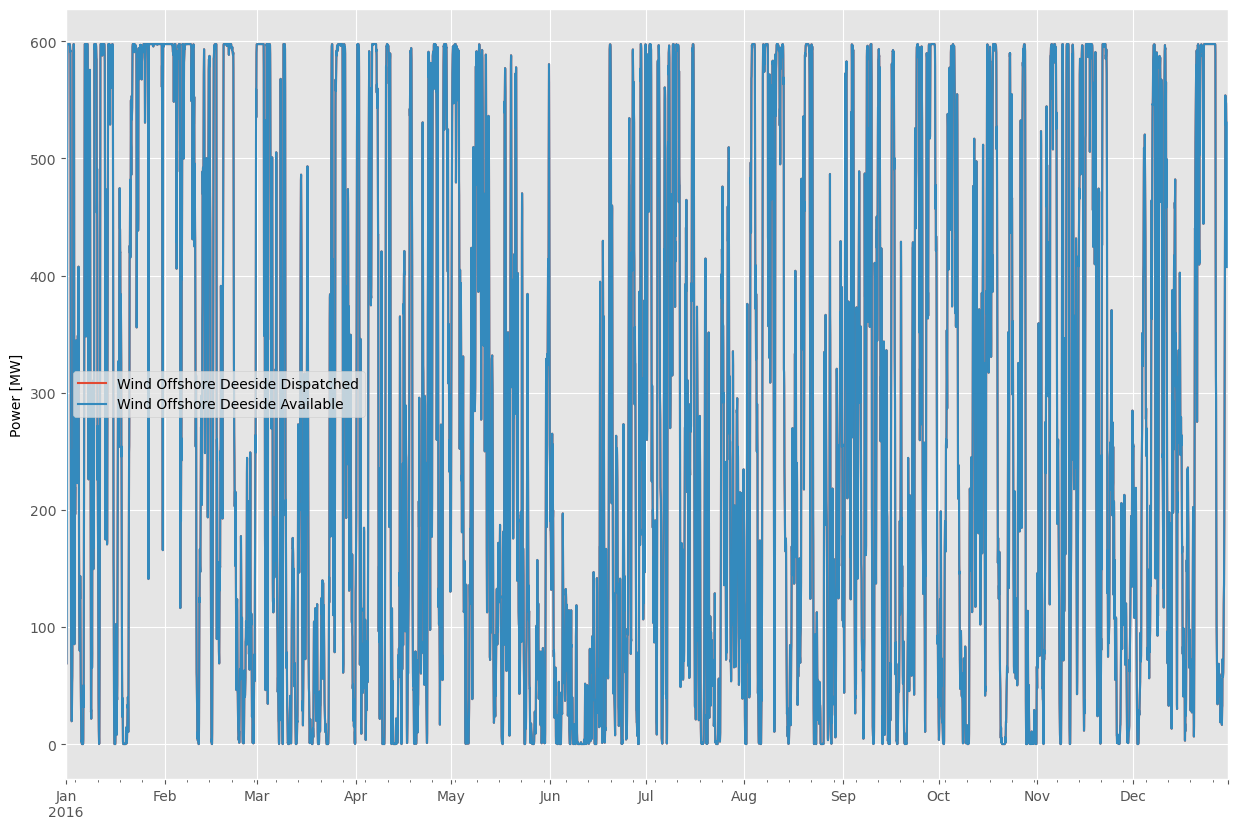

In [10]:
name='Wind Offshore Deeside'
type(My_network.generators_t.p_max_pu[name])
#My_network.generators.groupby("carrier").sum().at[carrier, "p_nom"]
#p_available = My_network.generators_t.p_max_pu
wind_offshore_deeside_available=My_network.generators.at[name,'p_nom']*My_network.generators_t.p_max_pu[name]
# next find the dispatched power at deeside
dispatched_wind_offshore_deeside=My_network.generators_t.p['Wind Offshore Deeside']
curtailed_wind_offshore_deeside=wind_offshore_deeside_available-dispatched_wind_offshore_deeside

wind_offshore_deeside_df=pd.concat([dispatched_wind_offshore_deeside.rename('Wind Offshore Deeside Dispatched'),wind_offshore_deeside_available.rename('Wind Offshore Deeside Available')],axis=1)


fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)
wind_offshore_deeside_df.plot(ax=ax)

ax.set_xlabel("")
ax.set_ylabel("Power [MW]")
ax.legend()